# Unit 5 - Financial Planning

In [172]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [173]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [114]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [115]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [116]:
# Fetch current BTC price
# YOUR CODE HERE!
response = requests.get(btc_url)
data = response.json()

bitcoin_price = data['data']['1']['quotes']['CAD']['price']

print(f"Bitcoin Price (CAD): {bitcoin_price}")

# Fetch current ETH price
# YOUR CODE HERE!

response = requests.get(eth_url)
data = response.json()

ethereum_price = data['data']['1027']['quotes']['CAD']['price']

print(f"Ethereum Price (CAD): {ethereum_price}")

# Compute current value of my crpto
my_btc_value = my_btc * bitcoin_price
my_eth_value = my_eth * ethereum_price
current_value_crypto= my_btc_value + my_eth_value

# YOUR CODE HERE!

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of crypto wallet = $ {current_value_crypto:0.2f}")

Bitcoin Price (CAD): 54345.434
Ethereum Price (CAD): 3031.044445
The current value of your 1.2 BTC is $65214.52
The current value of your 5.3 ETH is $16064.54
The current value of crypto wallet = $ 81279.06


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [117]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [26]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
api_keys=os.getenv('ALPACA_API_KEY')
api_secret_key =os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca =tradeapi.REST(api_keys, api_secret_key, api_version='v2' )

In [118]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp ('2024-01-24', tz ='America/New_york').isoformat()
today

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(tickers, timeframe, start=today, end = today).df
df_portfolio

# Reorganize the DataFrame
# YOUR CODE HERE!
AGG = df_portfolio[df_portfolio['symbol']=='AGG']
AGG

SPY = df_portfolio[df_portfolio['symbol']=='SPY']
SPY
# Separate ticker data

AGG= AGG.drop('symbol', axis =1)
AGG

SPY=SPY.drop('symbol', axis =1)
SPY

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio = pd.concat([AGG,SPY], axis =1, keys= ['AGG', 'SPY'])

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio                                                       


AGG                                            \
                           close   high   low trade_count   open    volume   
timestamp                                                                    
2024-01-24 05:00:00+00:00  97.74  98.33  97.7       42228  98.29  11278509   

                                        SPY                                \
                               vwap   close    high       low trade_count   
timestamp                                                                   
2024-01-24 05:00:00+00:00  97.89025  485.39  488.77  484.8819      620914   

                                                         
                             open    volume        vwap  
timestamp                                                
2024-01-24 05:00:00+00:00  487.81  81743585  486.644053

In [174]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close_price = df_portfolio ['AGG']['close'].iloc[0]

spy_close_price = df_portfolio ['SPY']['close'].iloc[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.74
Current SPY closing price: $485.39


In [175]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value= my_agg * agg_close_price
my_spy_value= my_spy * spy_close_price
total_value_shares = my_agg_value+my_spy_value


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $24269.50
The current value of your 200 AGG shares is $19548.00


### Savings Health Analysis

In [181]:
# Set monthly household income
# YOUR CODE HERE

monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
# Display DataFrame data
# Create savings DataFrame
# YOUR CODE HERE!

value_data={
    "crypto": [my_btc_value + my_eth_value],
    "shares": [my_agg_value +my_spy_value]
}

# Create a DataFrame with the current value of shares
df_savings = pd.DataFrame(value_data, index=['amount'])
df_savings = df_savings.T

# Display savings DataFrame
#df_savings= df_saving.transpose().rename(columns={"0":"amount"}, inplace=True)
df_savings                                       

,amount
crypto,81279.056359
shares,43817.500000


<Axes: title={'center': 'Amount of saving in each assets'}, ylabel='amount'>

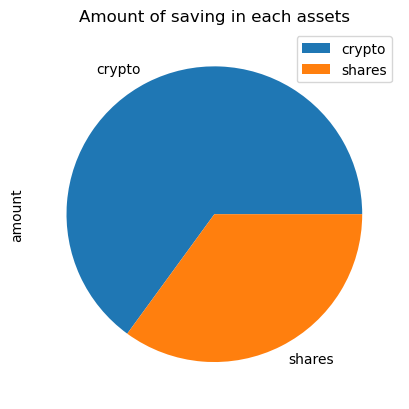

In [183]:
# Plot savings pie chart
# YOUR CODE HERE!


df_savings.plot.pie(y= "amount" , title= "Amount of saving in each assets")


In [126]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = current_value_crypto + total_value_shares

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    message = "Congratulations! You have enough money in your emergency fund."
elif total_savings == emergency_fund:
    message = "Congratulations! You have reached your financial goal for the emergency fund."
else:
    message = "You are $" + str(emergency_fund - total_savings) + " away from reaching your goal for the emergency fund."
    
print(message)


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [152]:
# Set start and end dates of five years back from today.


# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-01-24', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2024-01-24', tz='America/New_York').isoformat()

In [184]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_bars(tickers, timeframe, start=start_date, end = end_date).df


# Reorganize the DataFrame

AGG = df_stock_data [df_stock_data ['symbol']=='AGG']

SPY = df_stock_data [df_stock_data ['symbol']=='SPY']

# Separate ticker data
# YOUR CODE HERE!
AGG= AGG.drop('symbol', axis =1)
AGG

SPY=SPY.drop('symbol', axis =1)
SPY

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY], axis =1, keys= ['AGG', 'SPY'])
              
# Display sample data
df_stock_data.head()

AGG                                        \
                            close     high      low trade_count    open   
timestamp                                                                 
2019-01-24 05:00:00+00:00  106.73  106.840  106.670       14633  106.72   
2019-01-25 05:00:00+00:00  106.68  106.700  106.560       15541  106.64   
2019-01-28 05:00:00+00:00  106.62  106.745  106.580       17764  106.62   
2019-01-29 05:00:00+00:00  106.90  106.925  106.685       17524  106.73   
2019-01-30 05:00:00+00:00  107.14  107.150  106.790       18798  106.79   

                                                   SPY                    \
                            volume        vwap   close    high       low   
timestamp                                                                  
2019-01-24 05:00:00+00:00  7961374  106.741608  263.60  264.20  262.0800   
2019-01-25 05:00:00+00:00  3633492  106.640407  265.78  266.70  263.6595   
2019-01-28 05:00:00+00:00  8294535  106.634323  263.78  263.83  261.7900   
2019-01-29 05:00:00+00:00  6737073  106.839335  263.52  264.55  262.4800   
2019-01-30 05:00:00+00:00  7508665  107.030162  267.44  268.52  264.2500   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2019-01-24 05:00:00+00:00      315574  263.21  61342224  263.264945  
2019-01-25 05:00:00+00:00      409292  265.61  98218282  265.862184  
2019-01-28 05:00:00+00:00      408382  263.39  87421778  263.369609  
2019-01-29 05:00:00+00:00      287012  263.92  67650406  263.505274  
2019-01-30 05:00:00+00:00      469964  265.10  93982824  266.596859

In [159]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

from MCForecastTools1 import MCSimulation

MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [161]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear.portfolio_data.head()

AGG                                        \
                            close     high      low trade_count    open   
timestamp                                                                 
2019-01-24 05:00:00+00:00  106.73  106.840  106.670       14633  106.72   
2019-01-25 05:00:00+00:00  106.68  106.700  106.560       15541  106.64   
2019-01-28 05:00:00+00:00  106.62  106.745  106.580       17764  106.62   
2019-01-29 05:00:00+00:00  106.90  106.925  106.685       17524  106.73   
2019-01-30 05:00:00+00:00  107.14  107.150  106.790       18798  106.79   

                                                                       SPY  \
                            volume        vwap symbol daily_return   close   
timestamp                                                                    
2019-01-24 05:00:00+00:00  7961374  106.741608    AGG          NaN  263.60   
2019-01-25 05:00:00+00:00  3633492  106.640407    AGG    -0.000468  265.78   
2019-01-28 05:00:00+00:00  8294535  106.634323    AGG    -0.000562  263.78   
2019-01-29 05:00:00+00:00  6737073  106.839335    AGG     0.002626  263.52   
2019-01-30 05:00:00+00:00  7508665  107.030162    AGG     0.002245  267.44   

                                                                           \
                             high       low trade_count    open    volume   
timestamp                                                                   
2019-01-24 05:00:00+00:00  264.20  262.0800      315574  263.21  61342224   
2019-01-25 05:00:00+00:00  266.70  263.6595      409292  265.61  98218282   
2019-01-28 05:00:00+00:00  263.83  261.7900      408382  263.39  87421778   
2019-01-29 05:00:00+00:00  264.55  262.4800      287012  263.92  67650406   
2019-01-30 05:00:00+00:00  268.52  264.2500      469964  265.10  93982824   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2019-01-24 05:00:00+00:00  263.264945    SPY          NaN  
2019-01-25 05:00:00+00:00  265.862184    SPY     0.008270  
2019-01-28 05:00:00+00:00  263.369609    SPY    -0.007525  
2019-01-29 05:00:00+00:00  263.505274    SPY    -0.000986  
2019-01-30 05:00:00+00:00  266.596859    SPY     0.014876

In [162]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004651,1.006434,0.996613,1.001568,0.993345,0.988039,1.006540,1.000081,1.005038,1.000845,...,1.003033,0.991823,0.999245,1.003703,0.994144,0.997768,0.996769,0.998779,0.995506,0.995937
2,1.016098,0.994241,0.987370,1.008634,0.994513,0.990496,1.010675,1.011465,1.022476,0.998210,...,1.017614,0.987954,0.997141,1.000681,0.986642,1.001510,0.999174,1.004608,0.992973,0.989244
3,1.018159,1.000121,0.987774,1.003681,1.002295,0.987623,1.008409,1.002705,1.018990,1.001839,...,1.017640,0.987880,0.996986,1.001214,0.988832,0.993505,0.989645,1.001211,0.997221,1.000844
4,1.006843,0.988963,0.988874,1.008917,1.007061,0.976945,1.002936,1.010116,1.020893,0.999595,...,1.012057,0.997421,0.996186,0.996845,0.989866,0.991235,0.977461,1.005322,0.998421,0.997558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.567375,3.036217,7.961211,3.935261,2.953711,2.315093,7.886967,4.033721,7.768978,2.504806,...,4.753323,3.245099,1.604333,5.266661,2.483374,5.842093,1.704343,2.212204,2.517928,3.949391
7557,4.565258,3.082364,7.972310,3.898954,2.957209,2.319379,7.821991,4.032233,7.773921,2.492335,...,4.740680,3.227294,1.597087,5.280211,2.495359,5.802473,1.700362,2.208820,2.502628,3.945733
7558,4.531877,3.093206,7.990676,3.920018,2.973237,2.343917,7.864164,4.043316,7.772561,2.491989,...,4.729064,3.204299,1.598026,5.251674,2.508869,5.786006,1.699606,2.203391,2.511688,3.942152
7559,4.512352,3.103711,7.960565,3.885295,2.988338,2.354061,7.942104,4.039556,7.706566,2.489340,...,4.724478,3.246216,1.601725,5.230536,2.499988,5.803383,1.696240,2.211759,2.486889,3.934085


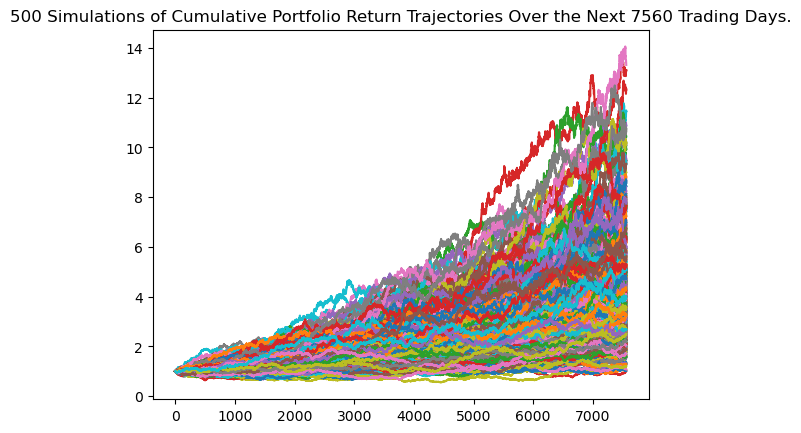

In [164]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_thirtyyear.plot_simulation()

line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

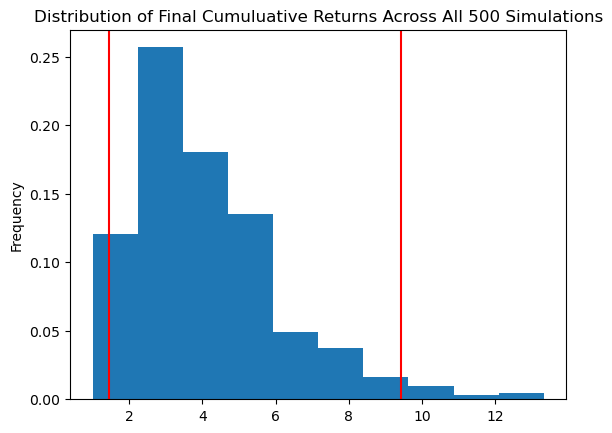

In [165]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [166]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyear.summarize_cumulative_return()


# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              4.106040
std               2.035179
min               1.013700
25%               2.646677
50%               3.607369
75%               5.059859
max              13.318098
95% CI Lower      1.446161
95% CI Upper      9.425201
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [171]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $28923.22 and $188504.03


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $143392.41 and $1921608.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


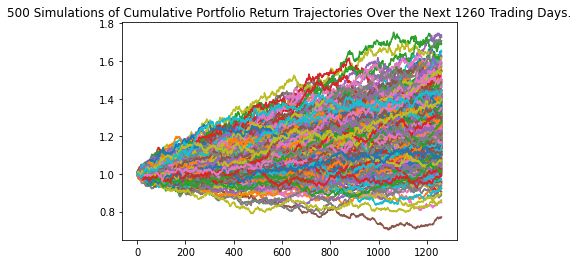

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

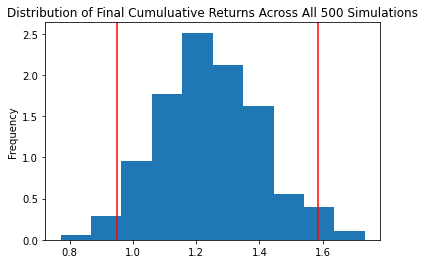

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


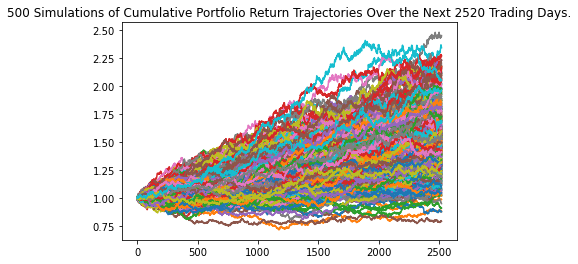

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

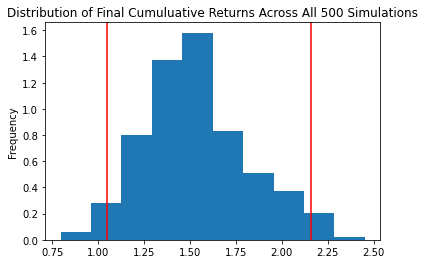

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
